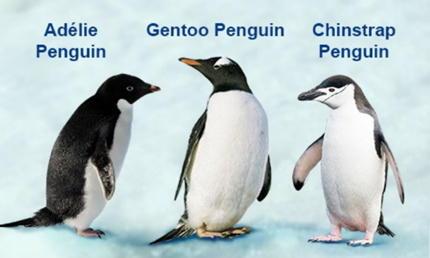

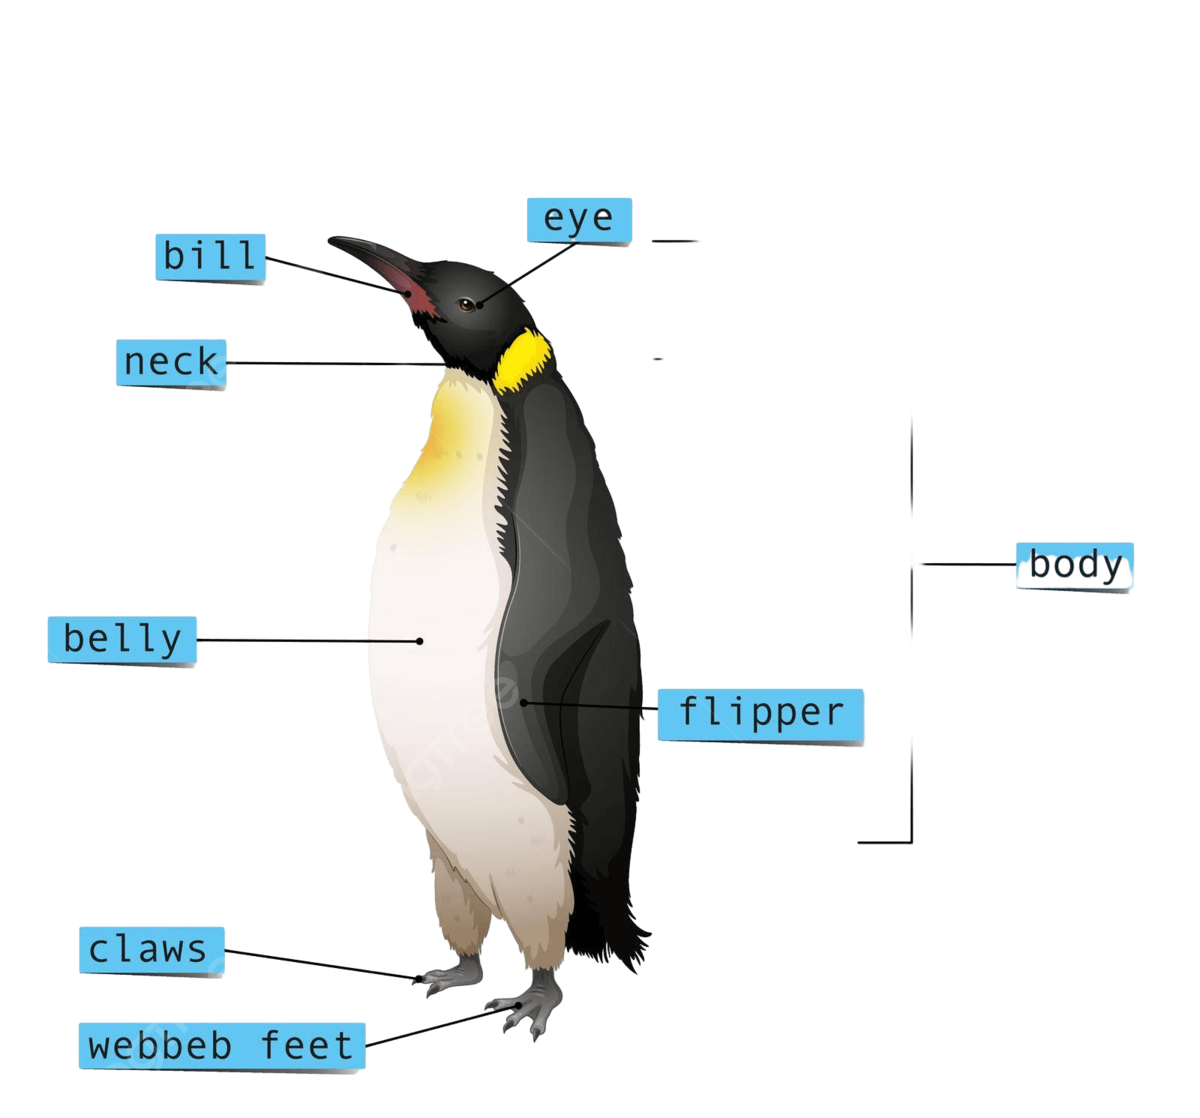

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

Framework of Model Building
Exploratory Data Analysis

* Univariate Analysis
* Bivariate Analysis
* Missing Value Interpretation
* Outlier Analysis and Treatment
* Feature Engineering
* Statistical Hypothesis Testing
* Categorical Variable Analysis and Encoding
* Scaling and Transformation
Note: Post EDA you have entered into the Pre Modeling stage.

Models

* Base Models- Average in case of Linear Regression, and in case of Classification - Highest Frequency
* Linear Regression
* Tree Based Models - Decision Tree, RandomForest, Gradient Boosting Machines etc.
* Remember ALL models should be cross validated models.

In [6]:
peng=sns.load_dataset('penguins')
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
peng['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
peng.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [12]:
peng.describe(include='object').T

,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,333,2,Male,168


In [13]:
for i in peng.columns:
    print(peng[i].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
bill_length_mm
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 164, dtype: int64
bill_depth_mm
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: count, Length: 80, dtype: int64
flipper_length_mm
190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
216.0     8
212.0     7
186.0     7
181.0     7
189.0     7
230.0     7
192.0     7
184.0     7
199.0     6
213.0     6
188.0     6
214.0     6
217.0     6
222.0     6
201.0     6
219.0     5
209.0     5
218.0     5
221.0     5
203.0     5
194.0     5
180.0     5
178.0     4
225.0     4
228.0     4
202.0     4
200.0   

### Univariate Analysis

Category: Countplot

Number: Histogram/Distplot

In [14]:
nums=peng.describe().columns
nums

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [16]:
cats=peng.describe(include='object').columns
cats

Index(['species', 'island', 'sex'], dtype='object')

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

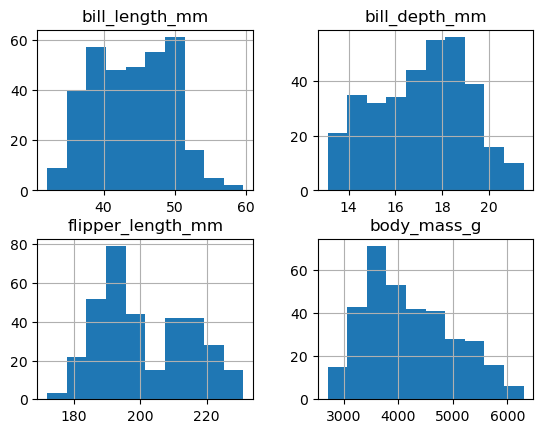

In [17]:
peng[nums].hist()

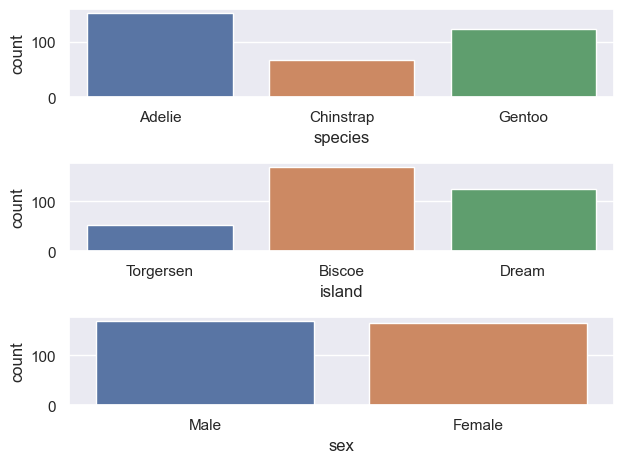

In [34]:
t=1
for i in cats:
    plt.subplot(3, 1, t)
    sns.countplot(data=peng, x=peng[i])
    t=t+1
    plt.tight_layout()


## Bivariate Analysis

<Axes: xlabel='species', ylabel='body_mass_g'>

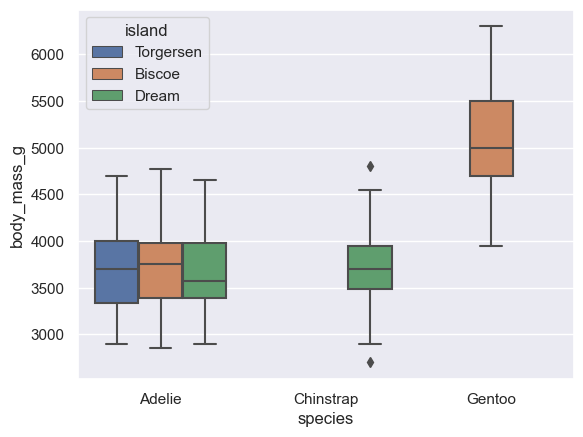

In [29]:
sns.boxplot(data=peng, x=peng['species'], y=peng['body_mass_g'], hue='island')

<Axes: >

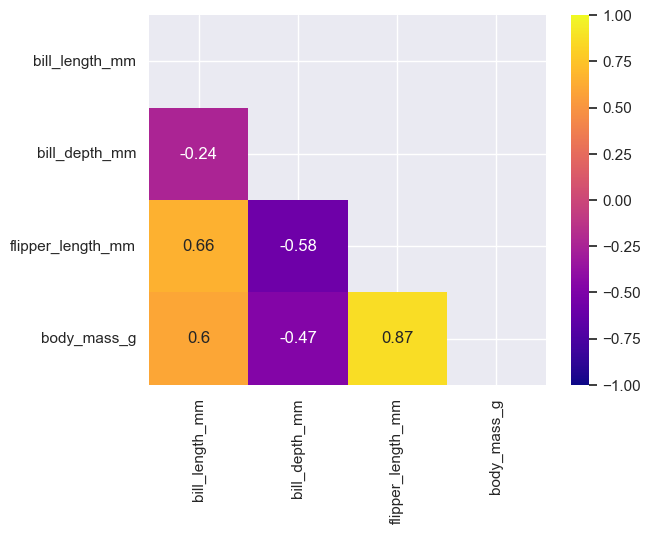

In [26]:
sns.heatmap(peng[nums].corr(), annot=True, cmap='plasma', mask=np.triu(peng[nums].corr()), vmax=1, vmin=-1)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

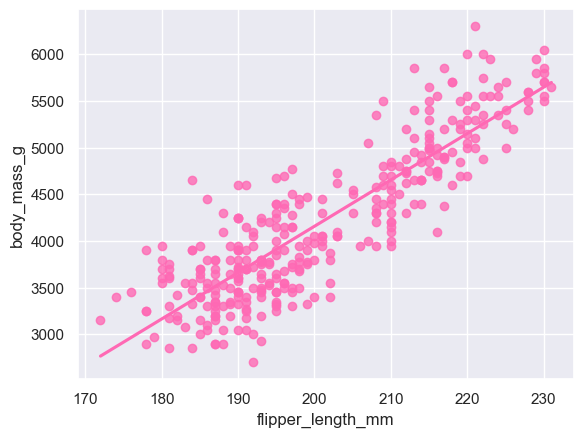

In [39]:
sns.regplot(data=peng, y=peng['body_mass_g'], x=peng['flipper_length_mm'], ci=0, color='hotpink', )

In [ ]:
sns.boxplot(data=peng, x=)

In [41]:
peng.loc[100:150, ]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,Male
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female
105,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male
106,Adelie,Biscoe,38.6,17.2,199.0,3750.0,Female
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,Male
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,Female
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male


In [48]:
pd.DataFrame(peng.groupby('species')['island'].value_counts()).T

species Adelie                  Chinstrap Gentoo
island   Dream Torgersen Biscoe     Dream Biscoe
count       56        52     44        68    124

In [54]:
pd.crosstab(peng['species'],peng['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [47]:
pd.pivot(datacolumns='species', values='island')

species,Adelie,Chinstrap,Gentoo
0,Torgersen,NaN,NaN
1,Torgersen,NaN,NaN
2,Torgersen,NaN,NaN
3,Torgersen,NaN,NaN
4,Torgersen,NaN,NaN
...,...,...,...
339,NaN,NaN,Biscoe
340,NaN,NaN,Biscoe
341,NaN,NaN,Biscoe
342,NaN,NaN,Biscoe
